In [2]:
from sklearn.datasets import load_iris

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
import numpy as np

In [10]:
iris = load_iris()

In [12]:
X, y = iris.data, iris.target#iris data categorised in two parts
class_names = iris.target_names

In [14]:
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
rf = RandomForestClassifier(n_estimators=20, random_state=42) 

In [22]:
rf

RandomForestClassifier(n_estimators=20, random_state=42)

In [24]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

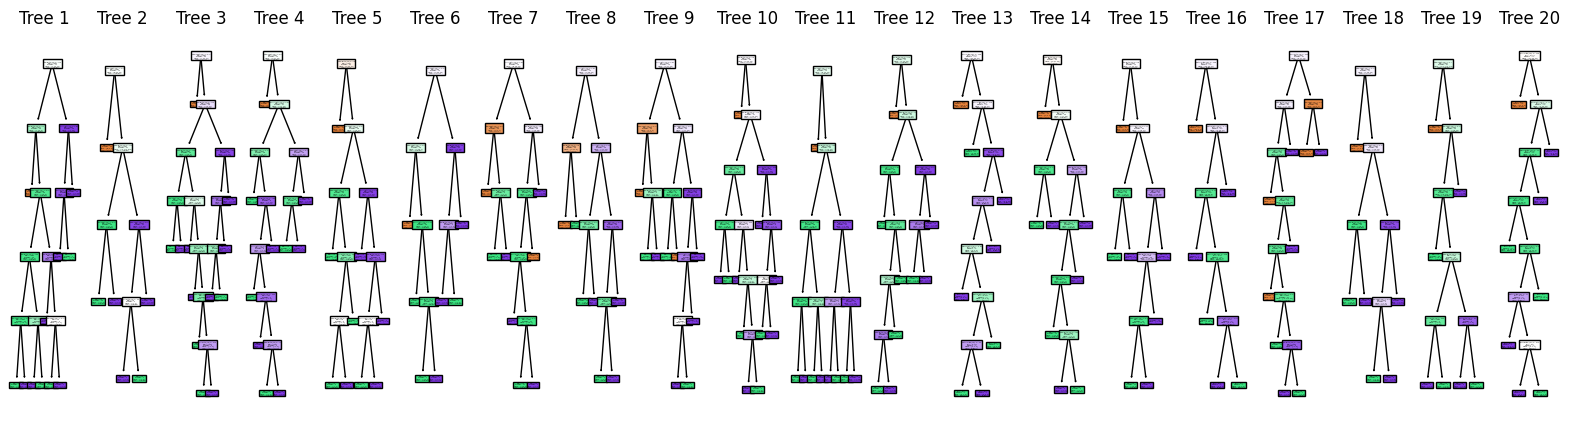

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
n_trees = len(rf.estimators_)
fig, axs = plt.subplots(1, n_trees, figsize=(20, 5))
for i, tree in enumerate(rf.estimators_):
    plot_tree(tree, 
              feature_names=iris.feature_names,
              class_names=class_names,
              filled=True,
              ax=axs[i])
    axs[i].set_title(f"Tree {i+1}")

In [28]:
X_test

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3

In [30]:
s= X_test[10].reshape(1,-1)
s

array([[6.5, 3.2, 5.1, 2. ]])

In [32]:
prediction = rf.predict(s)
print("Predicted class:", prediction)

Predicted class: [2]


In [34]:
tree_votes = [tree.predict(s)[0] for tree in rf.estimators_]
print("Tree votes:", tree_votes)

Tree votes: [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0]


In [36]:
print("Actual label:", y_test[10])

Actual label: 2


In [38]:
y_predicted=rf.predict(X_test)